# Project 2 : Working with Web Data
by 

ALLURI RATNA ANVESH, 
GUDA DEEPAK REDDY, 
MANASA SIDDIRAMAIAH.

# Part1: Working with HTML and JSON

In [1]:
#Importing the pandas as pd
import pandas as pd

In [2]:
#Reading the data of HTMLfile throgh github
Albums_html_df=pd.read_html("https://raw.githubusercontent.com/RatnaAnvesh/DAV-5400/main/Albums.html")
df_html=Albums_html_df[0]    #reading the dataframe from index 0
df_html

,Album Title,Artist,Year,Tracks
0,The Dark Side of the Moon,Pink Floyd,1973,Speak to Me Breathe On the Run Time The Gr...
1,Thriller,Michael Jackson,1982,Wanna Be Startin' Somethin' Baby Be Mine The...
2,Abbey Road,The Beatles,1969,Come Together Something Maxwell's Silver Ham...


Approach: Here we have created tables in HTML format and uploaded the file in Github repository. The HTML file in Github is read through the Github link into Albums_html_df. The file read is again read to df_html to retun the list of data frames in order. 

In [3]:
#reading the data of JSON file through Github
Albums_json_df=pd.read_json("https://raw.githubusercontent.com/RatnaAnvesh/DAV-5400/main/Albums.json")
Albums_json_df


,Album Title,Artist,Year,Tracks
0,The Dark Side of the Moon,Pink Floyd,1973,"[Speak to Me, Breathe, On the Run, Time, The G..."
1,Thriller,Michael Jackson,1982,"[Wanna Be Startin' Somethin', Baby Be Mine, Th..."
2,Abbey Road,The Beatles,1969,"[Come Together, Something, Maxwell's Silver Ha..."


Approach: Here we have created the table in JSON format and uploaded the files in Github Reposiyory. The JSON file in githib is read through the Github link into Albums_json_df

In [4]:
#Comparing the both the HTMl and JSon formats dataframes
df_html.equals(Albums_json_df)

False

Result: Here we have compared the both the tables of HTMl format and JSON formats. We can see that there is difference in data read from both the formats.

In [5]:
#comparing the HTMl and JSon dataframes
df_html==Albums_json_df

,Album Title,Artist,Year,Tracks
0,True,True,True,False
1,True,True,True,False
2,True,True,True,False


Approach: Here we can again see the comparison of both the data frames column wise. We can see that the data returned in both formats are same.

Conclusion: By seeing the comparions of the both the data frames, we can come to the conclusion that the dataframes created in HTML and JSon are identical. 

# Part - 2: Scraping the katz school's "staff" web page

In [6]:
#importing request, Beautifulsoup, Regular Expression and pandas
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

In [8]:
#Reading the webpage
#Pulling the data using Beautifulsoup 
#creating the Beautifulsoup
soup = bs(requests.get('https://www.yu.edu/katz/staff').content, 'html.parser')
#Locating the "text-only"
staff=soup.findAll(class_="text-only")[0]
staff

<div class="text-only">
<div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
<p>Paul Russo, Vice Provost and Dean <br/>
Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>
<p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
 <br/>
Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>
<p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>
<p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> I 646.592.4777</p>
<p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">tabitha.col

In [9]:


#empty lists to hold the data 
offices=[]
names=[]
titles=[]
emails=[]
phones=[]
#scraping the office
for data in staff.find_all(['p','h3']):
    #Assinging the data to the offices coloumn 
    if data.name=='h3':
        office=data.text
        continue
    offices.append(office) 
#displaying the offices data
print("offices=",offices)

#scraping the email and phone number
for data in staff.find_all(['p']):
    #Assigning the data to the emails coloumn
    email=re.findall(r"\w+@\w+\.[a-z]{3}", data.text) #This re returns the logic that have [A-Za-z0-9_]@[A-Za-z0-9_].any three [a-z]
    if email:
        emails.append(email[0])
        if email:
            emails.append(email[0])
    else:
        emails.append('N/A')
     #Assigning the data to the phones coloumn    
    pattern = "\d{3}\-\d{3}\-\d{4}"  #this re returns the logic that have "[any three numbers]-[any three numbers]-[any four numbers]
    phone = re.findall(r'{}'.format(pattern), data.text)
    if phone:
        phones.append(phone[0])
    else:
        phones.append('N/A')
#displaying the emails data
print("emails=",emails)
#displaying the phones data
print("phones=",phones) 

#scraping the name and titles from the website
for data in staff.find_all(['p']):
    data_text = data.text.split('\n')[0]
    name_title_parts = data_text.split(',')
    
    if len(name_title_parts) >= 2:
        name = name_title_parts[0]
        title = name_title_parts[1]
    else:
        # Handle cases where name and title are not found
        name = 'N/A'
        title = 'N/A'
    
    names.append(name)
    titles.append(title)



offices= ['Office of the Dean\xa0', 'Office of the Dean\xa0', 'Office of the Dean\xa0', 'Office of the Dean\xa0', 'Office of the Dean\xa0', 'Office of the Dean\xa0', 'Office of the Dean\xa0', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Student Life', 'Graduate Student Life', 'Academic Operations and Teaching and Learning', 'Academic Operations and Teaching and Learning', 'Academic Operations and Teaching and Learning', 'Academic Operations and Teaching and Learning', 'Academic Operations and Teaching and Learning', 'Academic Operations and Teaching and Learning']
emails= ['N/A', 'ross2@yu.edu', 'ross2@yu.edu', 'hamilton@yu.edu', 'hamilton@yu.edu', 'rodman@yu.edu', 'rodman@yu.edu', 'collazo@yu.edu', 'collazo@yu.edu', 'leary@yu.edu', 'leary@yu.edu', 'N/A', 'hakimi@yu.edu', 'hakimi@yu.edu', 'velasquez@yu.edu', 'velasquez@yu.edu', 'matzner@yu.edu', 'matzner@yu.edu', 'zheng@yu.edu', 'zhen

Approach : 

    Offices:
        We will extract the offices which are under h3 so will locate the h3 header and extract that
        data and append it to offices list each time we scrape the data.
    email :
         We will extract the email using the regular expression and append it to emails list each time
         we scrape the data.
    phone number : 
          We will extract the phone number using the regular expression and append it to phones list each time
          we scrape the data.
    name and titles:
           In the scrapped data we find that name and titles in a same list so we separate it using split option and fetch the 
           data using indexing and slicing as well
           
           We will extract the name and title and append it to names list and title list 
           respectively each time we scrape the data from the website

Now we will create a dataframe from the list which contains the attributes data.

In [10]:
staff_info = pd.DataFrame(list(zip(offices, names,titles,emails,phones)),
               columns =['offices', 'names','titles','emails','phones'])
staff_info

,offices,names,titles,emails,phones
0,Office of the Dean,Paul Russo,Vice Provost and Dean,N/A,N/A
1,Office of the Dean,Aaron Ross,Assistant Dean for Academic Programs and Depu...,ross2@yu.edu,646-592-4148
2,Office of the Dean,Jackie Hamilton,Executive Director of Enrollment Management a...,ross2@yu.edu,646-787-6194
3,Office of the Dean,Pamela Rodman,Director of Finance and Administrationpamela....,hamilton@yu.edu,N/A
4,Office of the Dean,Tabitha Collazo,Business and Operations Coordinatortabitha.co...,hamilton@yu.edu,646-592-4735
5,Office of the Dean,Ann Leary,Office Manager/Executive Assistant to the Dea...,rodman@yu.edu,646-592-4724
6,Office of the Dean,N/A,N/A,rodman@yu.edu,N/A
7,Graduate Admissions,Jared Hakimi,Directorjared.hakimi@yu.edu | 646-592-4722 | ...,collazo@yu.edu,646-592-4722
8,Graduate Admissions,Xavier Velasquez,Associate Director of Graduate Admissions Ope...,collazo@yu.edu,646-592-4737
9,Graduate Admissions,Shayna Matzner,Assistant Directorshayna.matzner@yu.edu I 646...,leary@yu.edu,646-592-4726


# Part - 3 : Working with Web API's

# Introduction

From the website of the NewsData.IO, we have used the Breaking news related to bussiness data. This newsdata.io web site provides a rich set of APIs for accessing both live breaking news and historical news which have the  information about the links and metadata is provided in.
Questions for Analysis:

1. How many creaters are for breaking news realted to bussiness data?

2. From which sources we are getting most of the breaking news?

# Data Preparation

In [12]:
import pandas as pd
from pandas import json_normalize
import requests

# Reading the API key
APIKEY = 'pub_326538142cb0e728f87b7d7a5ccb0f5159d7c'

# Reading the API from the website
url = f'https://newsdata.io/api/1/news?apikey={APIKEY}&q=breaking%20news%20&country=us&language=en&category=business '

# Make the API request using the requests library
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response and normalize it
    breaking_news = response.json()
    # Display the resulting DataFrame
    print(breaking_news)
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}")

{'status': 'success', 'totalResults': 33, 'results': [{'article_id': '207a5ff82a40c6835724d168137f4a8a', 'title': 'Israel-Hamas Conflict: The Bleak Numbers After 36 Days Of Fighting', 'link': 'https://www.forbes.com/sites/antoniopequenoiv/2023/11/11/israel-hamas-conflict-the-bleak-numbers-after-36-days-of-fighting/', 'keywords': ['Business', '/business', 'Business', '/business', 'Breaking', 'breaking-news', 'topline'], 'creator': ['Antonio Pequeño IV', ' Forbes Staff'], 'video_url': None, 'description': 'The Israel-Hamas war has gone on for more than a month now, killing thousands.', 'content': 'Forbes Business Breaking Israel-Hamas Conflict: The Bleak Numbers After 36 Days Of Fighting Antonio Pequeño IV Forbes Staff I cover breaking news. Following Click to save this article. You\'ll be asked to sign into your Forbes account. Nov 11, 2023, 05:26pm EST Press play to listen to this article! Got it! Share to Facebook Share to Twitter Share to Linkedin Topline The war between Israel and H

Approach: We will create the account in the website to get the api key and access the API with that key and fetch the data in json format

Now we are normalizing the format and display the data in data frame format as below

In [14]:
#Flattering JSON into Dataframe
breaking_news_out=json_normalize(breaking_news["results"])
breaking_news_out

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,207a5ff82a40c6835724d168137f4a8a,Israel-Hamas Conflict: The Bleak Numbers After...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Business, /business, Business, /business, Bre...","[Antonio Pequeño IV, Forbes Staff]",None,The Israel-Hamas war has gone on for more than...,Forbes Business Breaking Israel-Hamas Conflict...,2023-11-11 22:26:07,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
1,e3a5a2b3b108fe5d02bb32af725cd95d,‘The Marvels’ Tallies Only $21.5 Million At Bo...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Business, /business, Business, /business, Bre...","[Antonio Pequeño IV, Forbes Staff]",None,The movie is projected to deliver the worst we...,Forbes Business Breaking ‘The Marvels’ Tallies...,2023-11-11 17:50:05,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
2,97d7c94e7e00c9d1eaeef3d36ca8fc25,Iceland’s Earthquake Swarm: What We Know About...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Business, /business, Business, /business, Bre...","[Antonio Pequeño IV, Forbes Staff]",None,Meteorologists believe the quakes are indicati...,Forbes Business Breaking Iceland’s Earthquake ...,2023-11-11 16:01:31,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
3,629a246f93cb5e0ea0b3cdbf71910e05,From Which Countries Does Aldi Get Its Wine?,https://www.thedailymeal.com/1439642/aldi-wine...,[Aldi],None,None,Aldi sources its wine from all over the globe ...,Aldi has gained a fantastic reputation for sel...,2023-11-11 13:25:12,https://www.thedailymeal.com/img/gallery/what-...,thedailymeal,2761,[united states of america],[business],english
4,5b76bd8b75a937e85f09ff1a6950d59e,Pub West offers free meal for veterans on Vete...,https://www.inforum.com/business/pub-west-offe...,None,None,None,The restaurant wants to give back to those who...,WEST FARGO — One West Fargo business will be h...,2023-11-11 00:49:07,None,inforum,14163,[united states of america],[business],english
5,90ce514c96ba79b8d0c2691470fc5512,Judge Grants Keke Palmer Temporary Sole Custod...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Business, /business, Business, /business, Bre...","[Antonio Pequeño IV, Forbes Staff]",None,"Palmer and the child’s father, Darius Jackson,...",Forbes Business Breaking Judge Grants Keke Pal...,2023-11-11 00:12:22,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
6,136ff430eb970ad67e03a1d55d64584f,Day 2 Of NBA In-Season Tournament Starts Tonig...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Business, /business, Business, /business, Bre...","[Antonio Pequeño IV, Forbes Staff]",None,Thirteen teams make their tournament debuts Fr...,Forbes Business Breaking Day 2 Of NBA In-Seaso...,2023-11-10 23:30:19,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
7,b99b5537d60e436eb93d605e22b41d9b,"A 7% wage increase, new AI protections and oth...",https://www.latimes.com/entertainment-arts/bus...,None,None,None,The SAG-AFTRA board has approved a landmark de...,SAG-AFTRA’s national board of directors on Fri...,2023-11-10 23:27:51,None,latimes,267,[united states of america],[business],english
8,4ef955b352261c422695c152d051b223,Columbia Suspends Student Groups Over Protests...,https://www.forbes.com/sites/brianbushard/2023...,"[Business, /business, Business, /business, Bre...","[Brian Bushard, Forbes Staff]",None,Columbia University suspended two student grou...,Forbes Business Breaking Columbia Suspends Stu...,2023-11-10 21:52:52,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
9,d98488cb766c81a04fd3f76ea2690627,Election Threats: What We Know About Suspiciou.

# Data Cleaning

The Data Frame consists a lot of coloumns which might not be useful for the analysis. Here we are dropping the coloumns for the further analysis the information we need.

In [15]:
breaking_news_out=breaking_news_out.drop(['keywords','video_url','description'], axis=1)
breaking_news_out.head(5)

,article_id,title,link,creator,content,pubDate,image_url,source_id,source_priority,country,category,language
0,207a5ff82a40c6835724d168137f4a8a,Israel-Hamas Conflict: The Bleak Numbers After...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Antonio Pequeño IV, Forbes Staff]",Forbes Business Breaking Israel-Hamas Conflict...,2023-11-11 22:26:07,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
1,e3a5a2b3b108fe5d02bb32af725cd95d,‘The Marvels’ Tallies Only $21.5 Million At Bo...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Antonio Pequeño IV, Forbes Staff]",Forbes Business Breaking ‘The Marvels’ Tallies...,2023-11-11 17:50:05,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
2,97d7c94e7e00c9d1eaeef3d36ca8fc25,Iceland’s Earthquake Swarm: What We Know About...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Antonio Pequeño IV, Forbes Staff]",Forbes Business Breaking Iceland’s Earthquake ...,2023-11-11 16:01:31,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
3,629a246f93cb5e0ea0b3cdbf71910e05,From Which Countries Does Aldi Get Its Wine?,https://www.thedailymeal.com/1439642/aldi-wine...,None,Aldi has gained a fantastic reputation for sel...,2023-11-11 13:25:12,https://www.thedailymeal.com/img/gallery/what-...,thedailymeal,2761,[united states of america],[business],english
4,5b76bd8b75a937e85f09ff1a6950d59e,Pub West offers free meal for veterans on Vete...,https://www.inforum.com/business/pub-west-offe...,None,WEST FARGO — One West Fargo business will be h...,2023-11-11 00:49:07,None,inforum,14163,[united states of america],[business],english


In [16]:
breaking_news_out.head() # displaying the first five rows

,article_id,title,link,creator,content,pubDate,image_url,source_id,source_priority,country,category,language
0,207a5ff82a40c6835724d168137f4a8a,Israel-Hamas Conflict: The Bleak Numbers After...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Antonio Pequeño IV, Forbes Staff]",Forbes Business Breaking Israel-Hamas Conflict...,2023-11-11 22:26:07,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
1,e3a5a2b3b108fe5d02bb32af725cd95d,‘The Marvels’ Tallies Only $21.5 Million At Bo...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Antonio Pequeño IV, Forbes Staff]",Forbes Business Breaking ‘The Marvels’ Tallies...,2023-11-11 17:50:05,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
2,97d7c94e7e00c9d1eaeef3d36ca8fc25,Iceland’s Earthquake Swarm: What We Know About...,https://www.forbes.com/sites/antoniopequenoiv/...,"[Antonio Pequeño IV, Forbes Staff]",Forbes Business Breaking Iceland’s Earthquake ...,2023-11-11 16:01:31,https://imageio.forbes.com/specials-images/ima...,forbes,57,[united states of america],[business],english
3,629a246f93cb5e0ea0b3cdbf71910e05,From Which Countries Does Aldi Get Its Wine?,https://www.thedailymeal.com/1439642/aldi-wine...,None,Aldi has gained a fantastic reputation for sel...,2023-11-11 13:25:12,https://www.thedailymeal.com/img/gallery/what-...,thedailymeal,2761,[united states of america],[business],english
4,5b76bd8b75a937e85f09ff1a6950d59e,Pub West offers free meal for veterans on Vete...,https://www.inforum.com/business/pub-west-offe...,None,WEST FARGO — One West Fargo business will be h...,2023-11-11 00:49:07,None,inforum,14163,[united states of america],[business],english


In [17]:
breaking_news_out.describe()

,source_priority
count,10.000000
mean,1759.000000
std,4439.305651
min,57.000000
25%,57.000000
50%,57.000000
75%,214.500000
max,14163.000000


# Data Analysis

Performing the basic sumamry statistics using above data.

In [18]:
breaking_news_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       10 non-null     object
 1   title            10 non-null     object
 2   link             10 non-null     object
 3   creator          7 non-null      object
 4   content          10 non-null     object
 5   pubDate          10 non-null     object
 6   image_url        8 non-null      object
 7   source_id        10 non-null     object
 8   source_priority  10 non-null     int64 
 9   country          10 non-null     object
 10  category         10 non-null     object
 11  language         10 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.1+ KB


To show the attributes and its data type for data analysis.

In [19]:
breaking_news_out["creator"].value_counts() # counting the creators using value_counts()

[Antonio Pequeño IV,  Forbes Staff]    6
[Brian Bushard,  Forbes Staff]         1
Name: creator, dtype: int64

From the above result we can observe how many creators are there in New York Times.

<Axes: title={'center': 'creators'}>

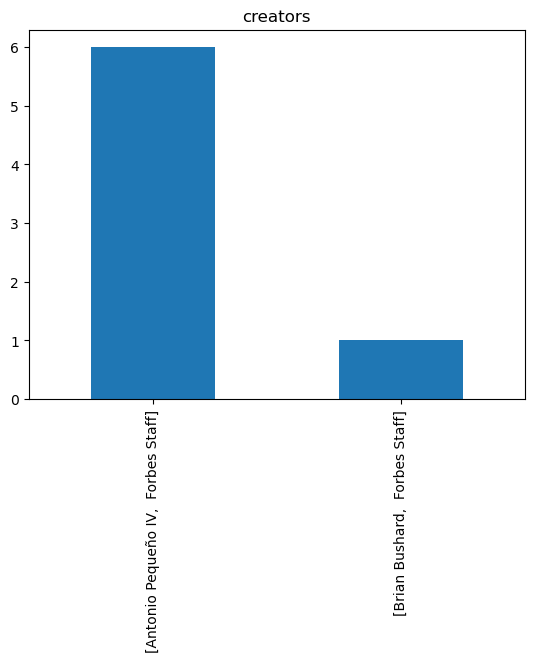

In [20]:
#plotting the bar chart
breaking_news_out.creator.value_counts().plot.bar(title = "creators")

In [21]:
#counting the type of articles published
breaking_news_out["source_id"].value_counts()    # counting the articles using value_counts()

forbes          7
thedailymeal    1
inforum         1
latimes         1
Name: source_id, dtype: int64

From the above results we can conclude how many total sources of breaking news and live blog post.

<Axes: title={'center': 'source_id'}>

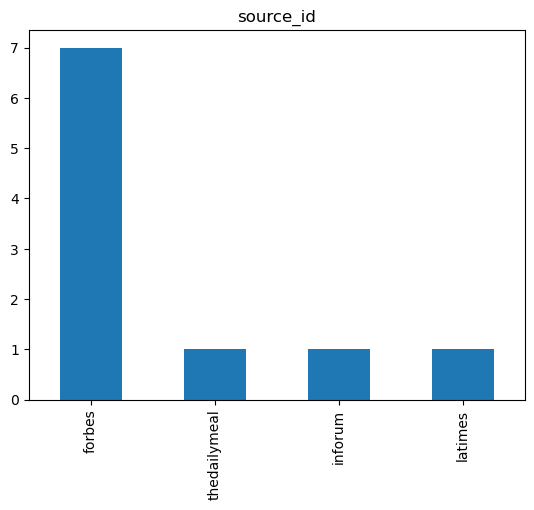

In [22]:
#Plotting the bar chart
breaking_news_out["source_id"].value_counts().plot.bar(title = "source_id")

Conclusion: From the bar chart we can conclude that most number of news are coming from forbes source in Breaking News.